In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('bigmart_train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train_data.shape

(8523, 12)

In [4]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [9]:
train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [10]:
train_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [11]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
train_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [13]:
train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
train_data['Outlet_Size'].mode()[0]

'Medium'

In [18]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

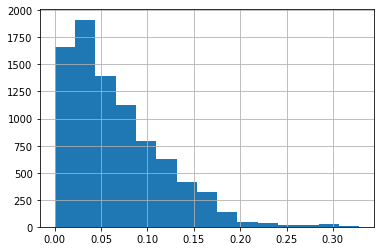

In [21]:
train_data['Item_Visibility'].hist(bins=15)

In [22]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
train_data['Item_Visibility_binned'] = pd.cut(train_data['Item_Visibility'],[-0.05, 0.065, 0.13, 0.2, 0.4], labels=['Low', 'Medium','High', 'VHigh'])

In [24]:
train_data['Item_Visibility_binned'].value_counts()

Low       4929
Medium    2557
High       903
VHigh      134
Name: Item_Visibility_binned, dtype: int64

In [25]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Visibility_binned       0
dtype: int64

In [26]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
train_data['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat', inplace=True)

In [28]:
train_data['Item_Fat_Content'].replace(['reg'], 'Regular', inplace=True)
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
train_data_cleaned = train_data.drop(['Item_Visibility'], axis = 1)
train_data_cleaned.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Visibility_binned'],
      dtype='object')

In [30]:
train_data_cleaned.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Item_Visibility_binned       category
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
train_data_cleaned['Item_Fat_Content'] = le.fit_transform(train_data_cleaned['Item_Fat_Content'])
train_data_cleaned['Outlet_Size'] = le.fit_transform(train_data_cleaned['Outlet_Size'])
train_data_cleaned['Outlet_Location_Type'] = le.fit_transform(train_data_cleaned['Outlet_Location_Type'])
train_data_cleaned['Item_Visibility_binned'] = le.fit_transform(train_data_cleaned['Item_Visibility_binned'])
train_data_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_binned
0,FDA15,9.30,0,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,1
1,DRC01,5.92,1,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,1
2,FDN15,17.50,0,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,1
3,FDX07,19.20,1,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,1
4,NCD19,8.93,0,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,1


In [34]:
train_data_cleaned.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Visibility_binned         int64
dtype: object

In [35]:
dummy = pd.get_dummies(train_data_cleaned['Outlet_Type'])
dummy

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [36]:
train_data_cleaned = pd.concat([train_data_cleaned, dummy], axis = 1)
train_data_cleaned.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Visibility_binned         int64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [37]:
train_data_cleaned.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type', 'Outlet_Establishment_Year'], axis = 1, inplace=True)

In [38]:
train_data_cleaned.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_binned,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,249.8092,1,0,3735.1380,1,0,1,0,0
1,5.92,1,48.2692,1,2,443.4228,1,0,0,1,0
2,17.50,0,141.6180,1,0,2097.2700,1,0,1,0,0
3,19.20,1,182.0950,1,2,732.3800,1,1,0,0,0
4,8.93,0,53.8614,0,2,994.7052,1,0,1,0,0


In [39]:
train_data_cleaned.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Visibility_binned',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [40]:
features = train_data_cleaned.drop(['Item_Outlet_Sales'], axis = 1)
target = train_data_cleaned[['Item_Outlet_Sales']]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features,target)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
my_model = LinearRegression()

In [45]:
my_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
from sklearn.metrics import mean_squared_error

In [48]:
np.sqrt(mean_squared_error(my_model.predict(X_test),y_test))

1126.9572532157906

In [49]:
from sklearn.linear_model import Ridge

In [76]:
my_ridge_model = Ridge(alpha = 0.01, normalize=True)

In [77]:
my_ridge_model.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [78]:
np.sqrt(mean_squared_error(my_ridge_model.predict(X_test),y_test))

1126.9119702565165

In [84]:
my_ridge_model.score(X_test,y_test)

0.5532859969272541

In [79]:
from sklearn.linear_model import Lasso

In [80]:
my_lasso_model = Lasso(alpha=0.001, normalize=True)

In [81]:
my_lasso_model.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
np.sqrt(mean_squared_error(my_lasso_model.predict(X_test),y_test))

1126.940242052001

In [83]:
my_lasso_model.score(X_test,y_test)

0.5532635824606577